## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Exploratory Data Analysis

In [2]:
dataset = pd.read_csv('customers.csv')
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
dataset.shape

(200, 5)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
print(f'Missing values in each column: \n{dataset.isnull().sum()}')

Missing values in each column: 
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [7]:
print(f'Duplicated rows: {dataset.duplicated().sum()}')

Duplicated rows: 0


## Statistical Analysis

#### Summary statistics for different gender groups

In [8]:
male_data = dataset[dataset['Gender'] == 'Male']
female_data = dataset[dataset['Gender'] == 'Female']

male_summary_stats = male_data.describe()
female_summary_stats = female_data.describe()

In [9]:
print('Male Summary Statistics:')
print(male_summary_stats)

Male Summary Statistics:
       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
count   88.000000  88.000000           88.000000               88.000000
mean   104.238636  39.806818           62.227273               48.511364
std     57.483830  15.514812           26.638373               27.896770
min      1.000000  18.000000           15.000000                1.000000
25%     59.500000  27.750000           45.500000               24.500000
50%    106.500000  37.000000           62.500000               50.000000
75%    151.250000  50.500000           78.000000               70.000000
max    200.000000  70.000000          137.000000               97.000000


In [10]:
print('Female Summary Statistics:')
print(female_summary_stats)

Female Summary Statistics:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  112.000000  112.000000          112.000000              112.000000
mean    97.562500   38.098214           59.250000               51.526786
std     58.276412   12.644095           26.011952               24.114950
min      3.000000   18.000000           16.000000                5.000000
25%     46.750000   29.000000           39.750000               35.000000
50%     94.500000   35.000000           60.000000               50.000000
75%    148.250000   47.500000           77.250000               73.000000
max    197.000000   68.000000          126.000000               99.000000


#### Histograms to visualize the distributions of age, annual income, and spending score

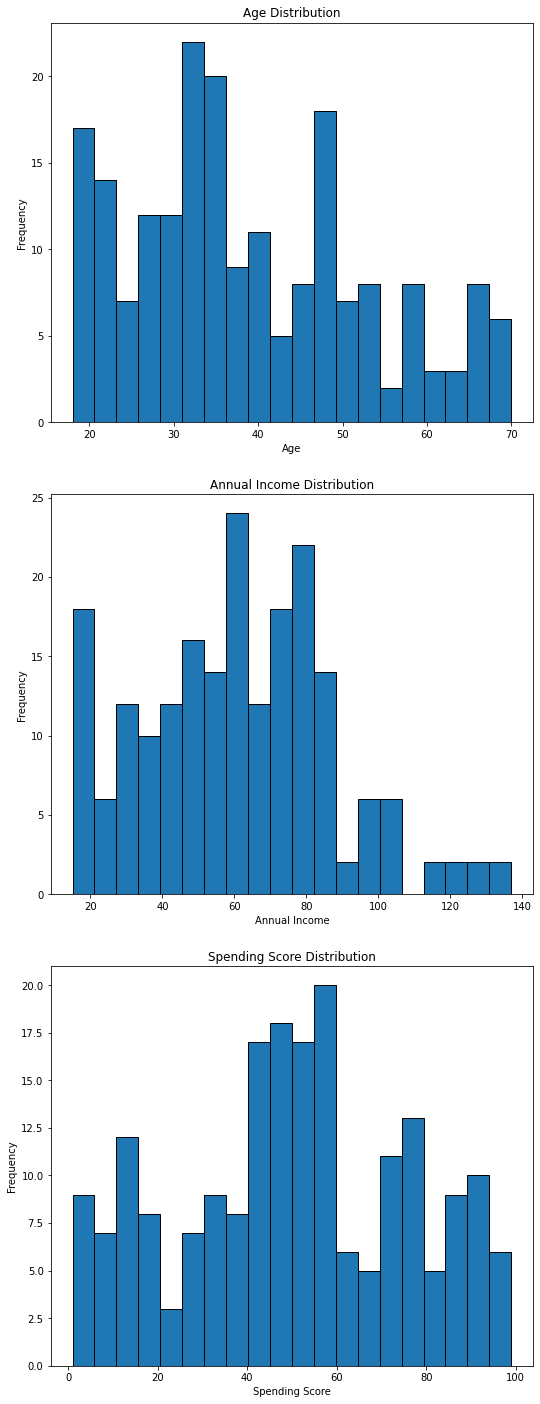

In [11]:
fig, axes = plt.subplots(3, 1, figsize=(8, 20))

axes[0].hist(dataset['Age'], bins=20, edgecolor='black')
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

axes[1].hist(dataset['Annual Income (k$)'], bins=20, edgecolor='black')
axes[1].set_title('Annual Income Distribution')
axes[1].set_xlabel('Annual Income')
axes[1].set_ylabel('Frequency')

axes[2].hist(dataset['Spending Score (1-100)'], bins=20, edgecolor='black')
axes[2].set_title('Spending Score Distribution')
axes[2].set_xlabel('Spending Score')
axes[2].set_ylabel('Frequency')

plt.tight_layout(pad=2.5)
plt.show()

#### Distribution plots to visualise the type of distribution of each feature

In [12]:
! pip install scipy

Defaulting to user installation because normal site-packages is not writeable


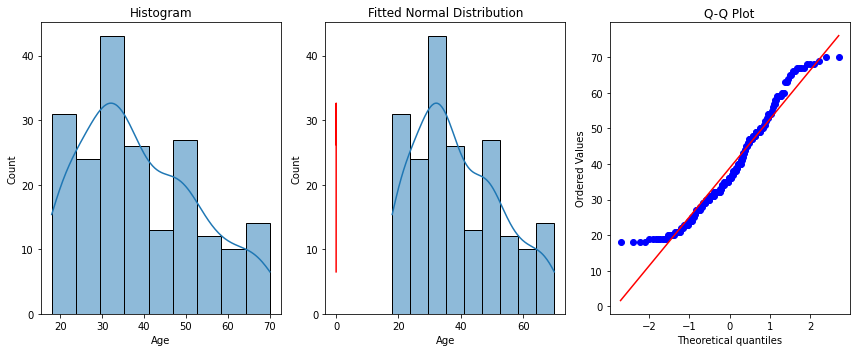

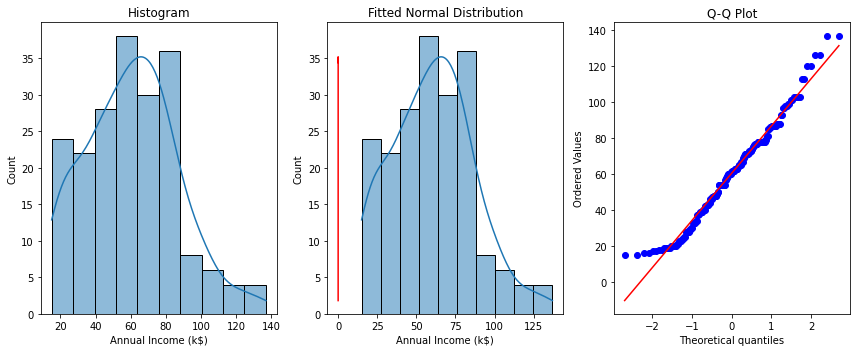

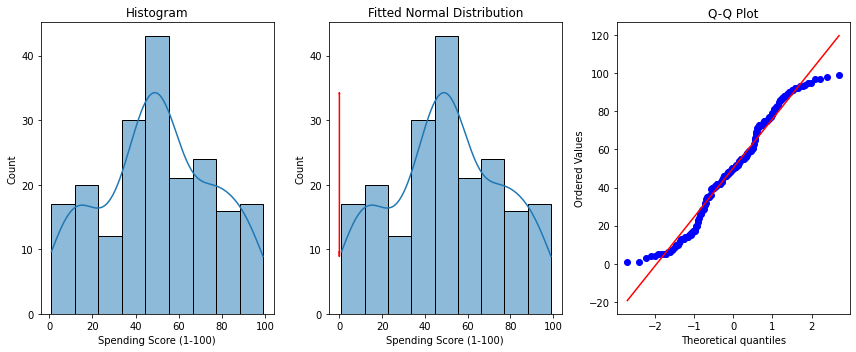

In [13]:
from scipy.stats import norm, probplot

variables = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for variable in variables:
    fig, axes = plt.subplots(1, 3, figsize=(12,5))
    sns.histplot(dataset[variable], ax=axes[0], kde=True)
    axes[0].set_title('Histogram')
    mu, sigma = norm.fit(dataset[variable])
    x = sns.histplot(dataset[variable], ax=axes[1], kde=True)
    x.set_title('Fitted Normal Distribution')
    x = sns.lineplot(x=norm.pdf(x.get_lines()[0].get_data()[0], mu, sigma), y=x.get_lines()[0].get_data()[1], ax=axes[1], color='r')
    probplot(dataset[variable], plot=axes[2])
    axes[2].set_title('Q-Q Plot')
    plt.tight_layout()
    plt.show()

-- Since the histogram and fitted curves show similar shapes and the Q-Q plots exhibit points roughly aligned with a straight line, we can conclude that all these features follow a normal distribution.

#### Box Plots to compare distributions across gender groups

Text(0, 0.5, 'Spending Score')

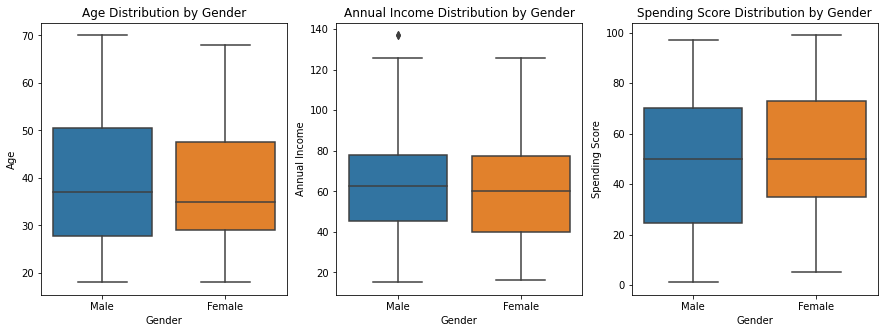

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(x='Gender', y='Age', data=dataset, ax=axes[0])
axes[0].set_title('Age Distribution by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Age')

sns.boxplot(x='Gender', y='Annual Income (k$)', data=dataset, ax=axes[1])
axes[1].set_title('Annual Income Distribution by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Annual Income')

sns.boxplot(x='Gender', y='Spending Score (1-100)', data=dataset, ax=axes[2])
axes[2].set_title('Spending Score Distribution by Gender')
axes[2].set_xlabel('Gender')
axes[2].set_ylabel('Spending Score')

#### Correlation between features

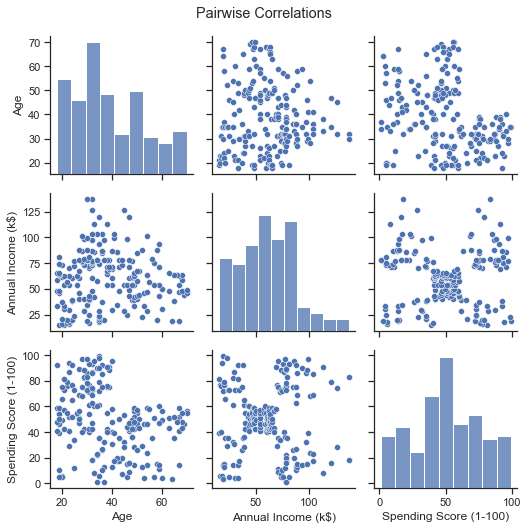

In [15]:
sns.set(style='ticks')
sns.pairplot(dataset[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']],)
plt.suptitle('Pairwise Correlations')
plt.tight_layout()
plt.show()

## K-Means Clustering

In [17]:
X = dataset.iloc[:, [3, 4]].values
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

#### Using the elbow method to find the optimal number of clusters

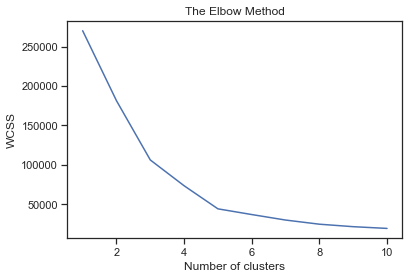

In [19]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

#### Training the K-Means model on the dataset

In [20]:
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [21]:
print(y_kmeans)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


## Visualising the clusters

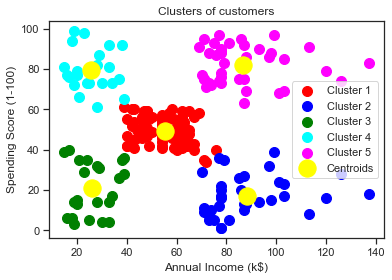

In [22]:
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c="red", label="Cluster 1")
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c="blue", label="Cluster 2")
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c="green", label="Cluster 3")
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c="cyan", label="Cluster 4")
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c="magenta", label="Cluster 5")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c="yellow", label="Centroids")
plt.title("Clusters of customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()